In [1]:
from examples.wmt_2020.common.util.reader import read_annotated_file, read_test_file
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

TRAIN_FILE = "data/et-en/train.eten.df.short.tsv"
DEV_FILE = "data/et-en/dev.eten.df.short.tsv"
TEST_FILE = "data/et-en/test20.eten.df.short.tsv"

train = read_annotated_file(TRAIN_FILE)
dev = read_annotated_file(DEV_FILE)
test = read_test_file(TEST_FILE)

train[:10]

,index,original,translation,z_mean
0,0,Kogu päeva kestnud Auvere lahingu tulemusena l...,The whole day-long Auvere battle resulted in t...,0.622231
1,1,Mweri ahelik on veelahe Kongo ja Niiluse jõgik...,The flotilla is a watershed between the Congo ...,0.246655
2,2,"""Love's Vision"" on Troy Jollimore'i filosoofil...","The ""Love"" Vision is a philosophical book by T...",-1.671190
3,3,"Aga on veel midagi eelnevat, nimelt kas säilit...","However, there is something else that has come...",0.792197
4,4,Kalmule andis rektori ametiraha üle Eesti pres...,Kalmule was handed over by President Kersti Ka...,-2.307636
5,5,"Asja mõte ei ole anda tunnetuse teooriat, ja v...",It is not a matter of giving the theory of sen...,0.758503
6,6,"Siinne jutt, et poliitikakunsti eesmärk on par...",The talk that political art has the best purpo...,0.993757
7,7,21. septembril 2007 tunnustas ta Giuseppe Li S...,"On 21 September 2007, he recognised the coordi...",-0.023601
8,8,Ukraina parlamendis kukkus läbi Volodõmõr Orgõ...,"In the Ukrainian Parliament, the confirmation ...",0.390095
9,9,"Hiljem, kui Nagy arreteeriti Jugoslaavia saatk...",Later than Nagy was arrested in the Yugoslav E...,-0.391146


In [2]:
train.describe()

,z_mean
count,7000.000000
mean,0.026983
std,0.949922
min,-2.754328
25%,-0.745929
50%,0.307530
75%,0.817018
max,1.381537


In [3]:
dev.describe()

,z_mean
count,1000.000000
mean,0.016815
std,0.867149
min,-1.861602
25%,-0.683383
50%,0.047645
75%,0.891108
max,1.326773


mean-original 12.11 std-original 3.78 mean-translation 17.24 std-translation 5.50 max-original 26.00 max-translation 38.00


<Figure size 432x288 with 0 Axes>

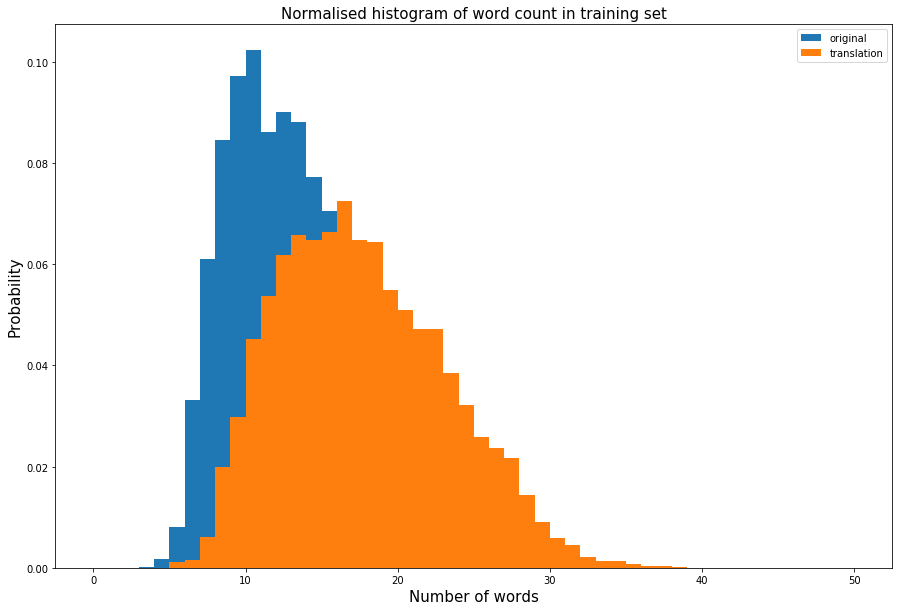

In [4]:
import matplotlib.pyplot as plt

plt.figure()
original_qs = pd.Series(train['original'].tolist()).astype(str)
translation_qs = pd.Series(train['translation'].tolist()).astype(str)

dist_original = original_qs.apply(lambda x: len(x.split(' ')))
dist_translation = translation_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_original, bins=50, range=[0, 50], normed=True, label='original')
plt.hist(dist_translation, bins=50, range=[0, 50], normed=True, label='translation')
plt.title('Normalised histogram of word count in training set', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-original {:.2f} std-original {:.2f} mean-translation {:.2f} std-translation {:.2f} max-original {:.2f} max-translation {:.2f}'.format(dist_original.mean(),
                          dist_original.std(), dist_translation.mean(), dist_translation.std(), dist_original.max(), dist_translation.max()))

mean-original 12.45 std-original 3.90 mean-translation 17.77 std-translation 5.72 max-original 25.00 max-translation 36.00


<Figure size 432x288 with 0 Axes>

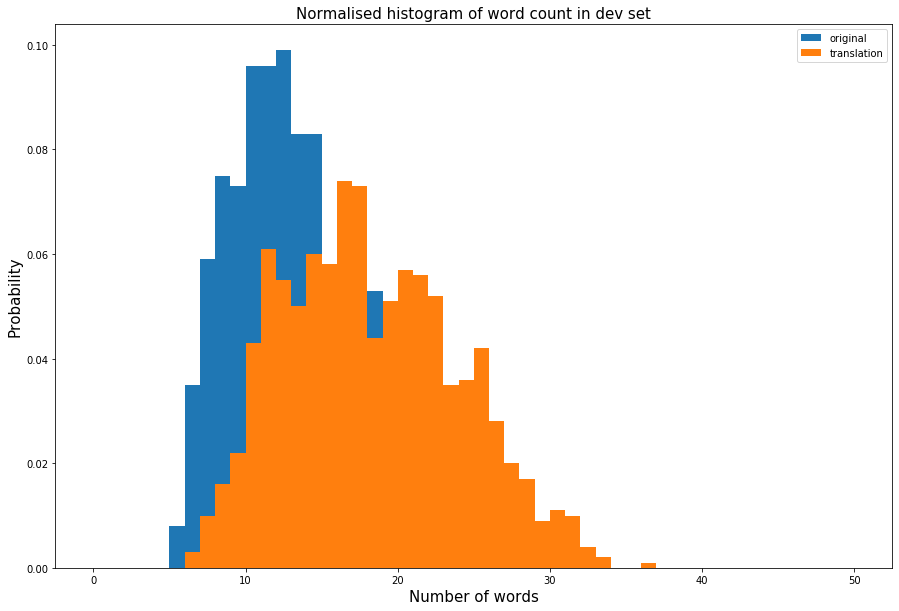

In [5]:

import matplotlib.pyplot as plt

plt.figure()
original_qs = pd.Series(dev['original'].tolist()).astype(str)
translation_qs = pd.Series(dev['translation'].tolist()).astype(str)

dist_original = original_qs.apply(lambda x: len(x.split(' ')))
dist_translation = translation_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_original, bins=50, range=[0, 50], normed=True, label='original')
plt.hist(dist_translation, bins=50, range=[0, 50], normed=True, label='translation')
plt.title('Normalised histogram of word count in dev set', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-original {:.2f} std-original {:.2f} mean-translation {:.2f} std-translation {:.2f} max-original {:.2f} max-translation {:.2f}'.format(dist_original.mean(),
                          dist_original.std(), dist_translation.mean(), dist_translation.std(), dist_original.max(), dist_translation.max()))





